# Библиотеки

In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Читаем датасет

In [239]:
path = '_data.csv'
rlst = pd.read_csv(path, index_col=0)
rlst


,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",+79154383401,...,NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79151173402,...,Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79653825192,...,На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79660611965,...,Во двор,"Совмещенный (1), Раздельный (1)",NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525


# Москва?
Посмотрим есть ли у нас квартиры не в Москве

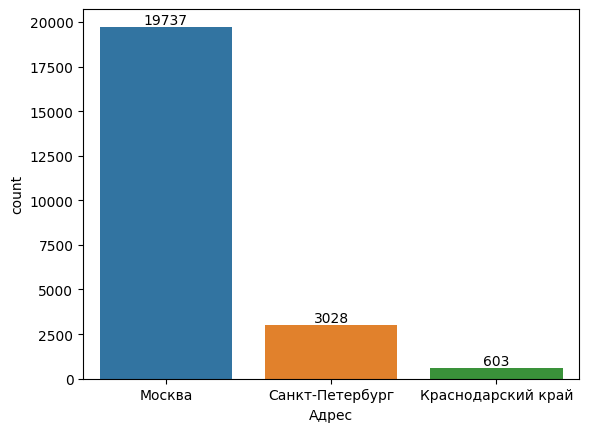

In [240]:
bars=sns.countplot(x=rlst['Адрес'].apply(lambda x: x.split(sep=', ')[0]))#Смотрим квартиры по городам
for i in bars.containers:
    bars.bar_label(i)


# Удаляем всё, что не Москва

In [241]:
rlst.drop(rlst.loc[rlst['Адрес'].apply(lambda x: x.split(sep=', ')[0])!='Москва'].index,inplace=True)
rlst.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19737 entries, 0 to 23367
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID  объявления            19737 non-null  int64  
 1   Количество комнат         19202 non-null  object 
 2   Тип                       19737 non-null  object 
 3   Метро                     19391 non-null  object 
 4   Адрес                     19737 non-null  object 
 5   Площадь, м2               19737 non-null  object 
 6   Дом                       19737 non-null  object 
 7   Парковка                  8563 non-null   object 
 8   Цена                      19737 non-null  object 
 9   Телефоны                  19737 non-null  object 
 10  Описание                  19737 non-null  object 
 11  Ремонт                    17274 non-null  object 
 12  Площадь комнат, м2        12509 non-null  object 
 13  Балкон                    13107 non-null  object 
 14  Окна       

# Инфо

In [242]:
rlst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19737 entries, 0 to 23367
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID  объявления            19737 non-null  int64  
 1   Количество комнат         19202 non-null  object 
 2   Тип                       19737 non-null  object 
 3   Метро                     19391 non-null  object 
 4   Адрес                     19737 non-null  object 
 5   Площадь, м2               19737 non-null  object 
 6   Дом                       19737 non-null  object 
 7   Парковка                  8563 non-null   object 
 8   Цена                      19737 non-null  object 
 9   Телефоны                  19737 non-null  object 
 10  Описание                  19737 non-null  object 
 11  Ремонт                    17274 non-null  object 
 12  Площадь комнат, м2        12509 non-null  object 
 13  Балкон                    13107 non-null  object 
 14  Окна       

# Смотрим нули подробнее

,Ненулевые,Нулевые
Параметр,,
ID объявления,19737,0
Количество комнат,19202,535
Тип,19737,0
Метро,19391,346
Адрес,19737,0
"Площадь, м2",19737,0
Дом,19737,0
Парковка,8563,11174
Цена,19737,0


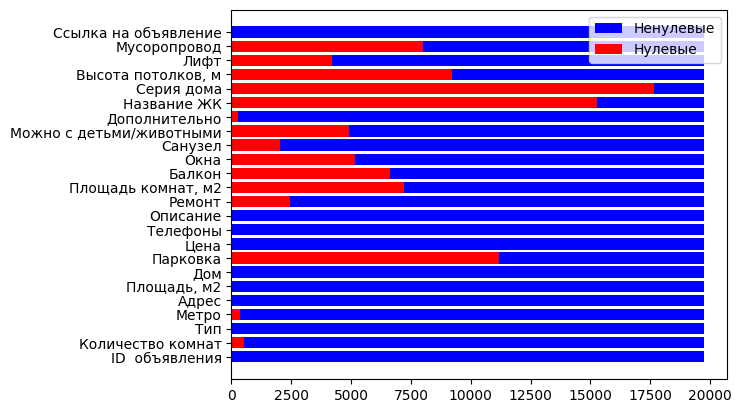

In [243]:
Nulls = pd.concat([rlst.count(), rlst.isnull().sum()], axis = 1).reset_index()
Nulls.rename(columns = {'index':'Параметр', 0:'Ненулевые', 1:'Нулевые'}, inplace = True)
Nulls.set_index('Параметр', inplace = True)
fig,ax= plt.subplots()
ax.barh(y = Nulls.index, width = Nulls['Ненулевые'], left=Nulls['Нулевые'],color='blue',label='Ненулевые')
ax.barh(y = Nulls.index, width = Nulls['Нулевые'],color='red',label='Нулевые')
for x,y in enumerate(zip(Nulls['Ненулевые'],Nulls['Нулевые'])):
    #ax.text(x=Nulls['Ненулевые'][x],y=y,s=str(x/(Nulls['Ненулевые']+Nulls['Нулевые']).max()))
    pass
                     
plt.legend()

Nulls


# Что мы видим?
Видим, что у названий ЖК и серии дома больше половины значений нулевые, так что эти столбцы можем смело выкинуть, к тому же у них маловероятна корелляция с ценой

In [244]:
formatted_rlst = rlst.copy()
formatted_rlst.drop(['Название ЖК','Серия дома'],axis=1,inplace=True)
formatted_rlst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19737 entries, 0 to 23367
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID  объявления            19737 non-null  int64  
 1   Количество комнат         19202 non-null  object 
 2   Тип                       19737 non-null  object 
 3   Метро                     19391 non-null  object 
 4   Адрес                     19737 non-null  object 
 5   Площадь, м2               19737 non-null  object 
 6   Дом                       19737 non-null  object 
 7   Парковка                  8563 non-null   object 
 8   Цена                      19737 non-null  object 
 9   Телефоны                  19737 non-null  object 
 10  Описание                  19737 non-null  object 
 11  Ремонт                    17274 non-null  object 
 12  Площадь комнат, м2        12509 non-null  object 
 13  Балкон                    13107 non-null  object 
 14  Окна       

# Describe
Также отбросим столбцы, которые никак не могут повлиять на цену

In [245]:
formatted_rlst= formatted_rlst.convert_dtypes()

formatted_rlst.drop(columns=['ID  объявления','Телефоны','Ссылка на объявление'],inplace=True)
formatted_rlst.info()
formatted_rlst.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 19737 entries, 0 to 23367
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Количество комнат         19202 non-null  string 
 1   Тип                       19737 non-null  string 
 2   Метро                     19391 non-null  string 
 3   Адрес                     19737 non-null  string 
 4   Площадь, м2               19737 non-null  string 
 5   Дом                       19737 non-null  string 
 6   Парковка                  8563 non-null   string 
 7   Цена                      19737 non-null  string 
 8   Описание                  19737 non-null  string 
 9   Ремонт                    17274 non-null  string 
 10  Площадь комнат, м2        12509 non-null  string 
 11  Балкон                    13107 non-null  string 
 12  Окна                      14587 non-null  string 
 13  Санузел                   17696 non-null  string 
 14  Можно с дет

,"Высота потолков, м"
count,10535.0
mean,2.992925
std,7.85274
min,1.2
25%,2.64
50%,2.64
75%,2.8
max,320.0


# Проверим оставшиеся значения на уникальность

,Параметр,Уникальные,Всего
0,Количество комнат,24,19202
1,Тип,1,19737
2,Метро,4871,19391
3,Адрес,10452,19737
4,"Площадь, м2",9585,19737
5,Дом,2415,19737
6,Парковка,5,8563
7,Цена,2219,19737
8,Описание,19456,19737
9,Ремонт,4,17274


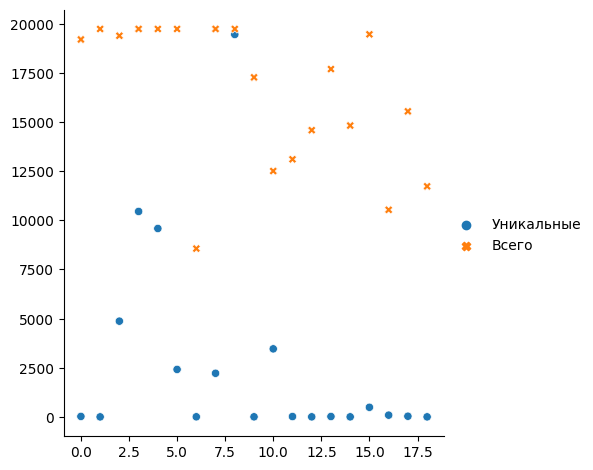

In [246]:
Uniqs = pd.concat([formatted_rlst.nunique(), formatted_rlst.count()], axis = 1).reset_index()
Uniqs.rename(columns = {'index':'Параметр', 0:'Уникальные', 1:'Всего'}, inplace = True)
sns.relplot(data=Uniqs)
Uniqs

# Далее рассмотрим отдельные параметры
## Парковка

,count
Парковка,
наземная,5283
подземная,2466
открытая,713
многоуровневая,100
на крыше,1


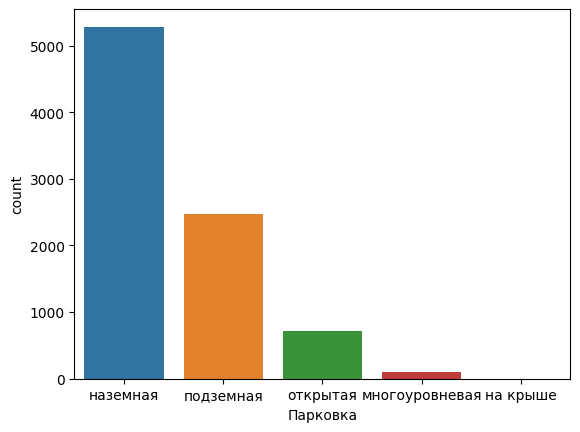

In [247]:
parking = pd.DataFrame(formatted_rlst['Парковка'].value_counts())
sns.barplot(data = parking, x = parking.index, y = 'count')
parking

## Цена

Средняя цена аренды, тыс\руб:  86563.85473982875
Минимальная цена аренды, тыс\руб:  5000.0
Максимальная цена аренды, тыс\руб:  3000000.0


<Axes: xlabel='Цена аренды', ylabel='Count'>

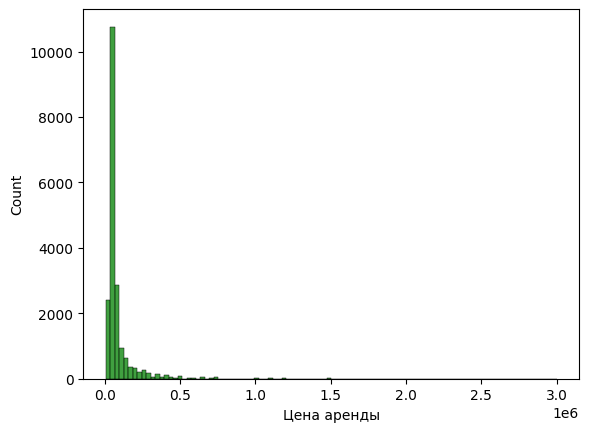

In [260]:
formatted_rlst['Цена аренды'] = formatted_rlst['Цена'].apply(lambda x: float(x.split('.')[0]))

# pd.options.display.float_format = '{:,.1f}'
rent_stats = formatted_rlst['Цена аренды'].agg(['mean', 'min', 'max'])

print("Средняя цена аренды, тыс\руб: ", rent_stats['mean'])
print("Минимальная цена аренды, тыс\руб: ", rent_stats['min'])
print("Максимальная цена аренды, тыс\руб: ", rent_stats['max'])


sns.histplot(x='Цена аренды', data=formatted_rlst, bins=100, color='green')

## Площадь

In [254]:
formatted_rlst['Общая площадь'] = formatted_rlst['Площадь, м2'].apply(lambda x: float(x.split('/')[0]))


# Здесь мы используем метод .agg для вычисления нескольких статистических показателей
# из столбца 'Общая площадь' в DataFrame formatted_rlst.
# Мы передаем список строковых значений ['mean', 'min', 'max'] в качестве аргумента метода .agg,
# чтобы вычислить среднее значение, минимальное значение и максимальное значение этого столбца.

stats = formatted_rlst['Общая площадь'].agg(['mean', 'min', 'max'])

print("Средняя площадь, м2: ", stats['mean'])
print("Минимальная площадь, м2: ", stats['min'])
print("Максимальная площадь, м2: ", stats['max'])

Средняя площадь, м2:  63.56484774788468
Минимальная площадь, м2:  7.0
Максимальная площадь, м2:  811.0


## Комнаты

<Axes: xlabel='Цена аренды', ylabel='Общая площадь'>

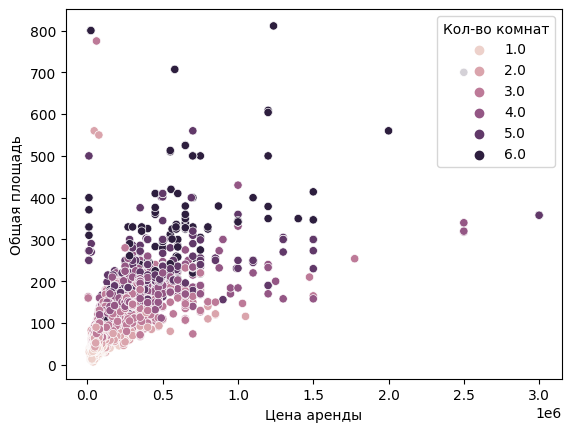

In [273]:
formatted_rlst['Кол-во комнат'] = formatted_rlst.loc[~pd.isna(formatted_rlst['Количество комнат'])]['Количество комнат'].apply(lambda x:float(x.split(',')[0]))
rooms_rlst = formatted_rlst.groupby('Цена аренды')[['Общая площадь', 'Количество комнат']]
new_formatted_rlst = formatted_rlst[['Цена аренды','Общая площадь', 'Кол-во комнат']]
new_formatted_rlst
sns.scatterplot(data=new_formatted_rlst, x='Цена аренды', y='Общая площадь', hue='Кол-во комнат')

## ~~Корреляция~~
Work in progress...


In [1]:

# ax,fig= plt.subplots(4,5)
# fig.size()
# for i,label in enumerate( formatted_rlst.columns):
#     ax[i]=sns.countplot(x=rlst[label])